In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [14]:
 def fundamental(tau=5,rank=100):
    
    #총자본
    capa=pd.ExcelFile('data/Data_4조12.xlsx')
    fu_cap=capa.parse('펀더자본')

    #무형
    intan=pd.ExcelFile('data/Data_4조5.xlsx')
    fu_intan=intan.parse('펀더자본')

    #자기주식
    treasury=pd.ExcelFile('data/Data_4조11.xlsx')
    fu_tre=treasury.parse('펀더자본')

    #매출
    sale=pd.ExcelFile('data/Data_4조4.xlsx')
    fu_sale=sale.parse('매출')

    #현금
    cfo=pd.ExcelFile('data/Data_4조2.xlsx')
    fu_cfo=cfo.parse('매출')

    #배당
    div=pd.ExcelFile('data/Data_4조10.xlsx')
    fu_div=div.parse('매출')

    #새수익률
    newre=pd.ExcelFile('data/Data_4조6.xlsx')
    fu_rtn=newre.parse('수익률')

    #새시총
    total=pd.ExcelFile('data/Data_4조7.xlsx')
    fu_total=total.parse('시총')

    assdates=fu_total['date']
    ff_cap=fu_cap[fu_cap.columns[1:]].fillna(0)
    ff_intan=fu_intan[fu_intan.columns[1:]].fillna(0)
    ff_tre=fu_tre[fu_tre.columns[1:]].fillna(0)
    ff_sale=fu_sale[fu_sale.columns[1:]].fillna(0)
    ff_cfo=fu_cfo[fu_cfo.columns[1:]].fillna(0)
    ff_div=fu_div[fu_div.columns[1:]].fillna(0)
    ff_netass=ff_cap-ff_intan-ff_tre
    ff_netass[ff_netass<0]=0

    #비중 음수는 0으로 변환
    tau=tau
    mean_sale=(ff_sale.rolling(tau).mean()).iloc[59:].reset_index(drop=True)
    mean_cfo=(ff_cfo.rolling(tau).mean()).iloc[59:].reset_index(drop=True)
    mean_div=(ff_div.rolling(tau).mean()).iloc[59:].reset_index(drop=True)
    mean_sale[(mean_sale<0)]=0
    mean_cfo[(mean_cfo<0)]=0
    mean_div[(mean_div<0)]=0

    #%% 각항목비중
    sumbv=ff_netass.sum(axis=1)
    sumsale=mean_sale.sum(axis=1)
    sumcfo=mean_cfo.sum(axis=1)
    sumdiv=mean_div.sum(axis=1)

    wbv=ff_netass.T/sumbv
    wsal=mean_sale.T/sumsale
    wcf=mean_cfo.T/sumcfo
    wdi=mean_div.T/sumdiv
    wbv=wbv.T
    wsal=wsal.T
    wcf=wcf.T
    wdi=wdi.T

    numdatebv=len(sumbv)
    numcolbv=len(ff_netass.columns)
    # 배당없으면 3개 평균 있으면 4개평균
    wi=np.zeros([numdatebv,numcolbv])
    for t in range(0,numdatebv):
        for i in range(0,numcolbv):

            if wdi.values[t,i]==0:
                wi[t,i]=(wbv.values[t,i]+wsal.values[t,i]+wcf.values[t,i])/3
            else:
                wi[t,i]=(wbv.values[t,i]+wsal.values[t,i]+wcf.values[t,i]+wdi.values[t,i])/4

    fu_rtn.index=fu_rtn['date']

    wi_df=pd.DataFrame(wi)
    wi_rank=wi_df.rank(ascending=False)
    wi100=wi_rank.copy()
    rank=rank
    wi100[wi100>rank]=0
    wi100[wi100>0]=1
    f_wi=pd.DataFrame(wi100).mul(wi)

    f_ret=fu_rtn.iloc[59:].drop(columns=['date']).fillna(0)

    xxx=np.zeros([numdatebv, numcolbv])

    for t in range(numdatebv):
        xxx[t,:]=f_ret.iloc[t,:]

    rpp=np.zeros([numdatebv,numcolbv])
    for t in range(numdatebv):
        rpp[t,:]=(list(f_wi.iloc[t-1,:])*xxx[t,:])

    f_rp=pd.DataFrame(rpp).sum(axis=1)

    f_rp.index=f_ret.index

    #%%#%%코스피
    kraw= pd.ExcelFile('data/Data_4조1.xlsx')
    kt=kraw.parse('k')

    k200=kt['현재가']
    k200_ret=((k200/k200.shift(1)-1)*100).fillna(0)
    k200_ret.index=kt['date']

    f_rp=f_rp.loc[k200_ret.index]

    #%%그림
    vp=(f_rp/100+1).cumprod()*100
    vk=(k200_ret/100+1).cumprod()*100

    vpmdd=(vp/vp.cummax()-1)*100
    vkmdd=(vk/vk.cummax()-1)*100

    #%% 그래프 그리기 
    fig = plt.figure(figsize=(10, 7))   # figsize = (가로길이, 세로길이)
    gs = gridspec.GridSpec(nrows=2,     # row 개수 
                           ncols=1,     # col 개수 
                           height_ratios=[8, 3], 
                           width_ratios=[5])  # subplot의 크기를 서로 다르게 설정

    ax0 = plt.subplot(gs[0])
    ax0.plot(vp,'b-')
    ax0.plot(vk,'r-')

    plt.ylabel('Cumulative Return')
    plt.title('Fundamental vs KOSPI200')
    ax0.grid(True)
    ax0.legend(labels=('fundamental','k200'))

    ax1 = plt.subplot(gs[1])
    ax1.plot(vpmdd,'b-')
    ax1.plot(vkmdd,'r-')

    ax1.grid(True)
    ax1.legend(labels=('mdd_fundamental','mdd_k200'), loc='lower right')

    plt.show()

    return 1

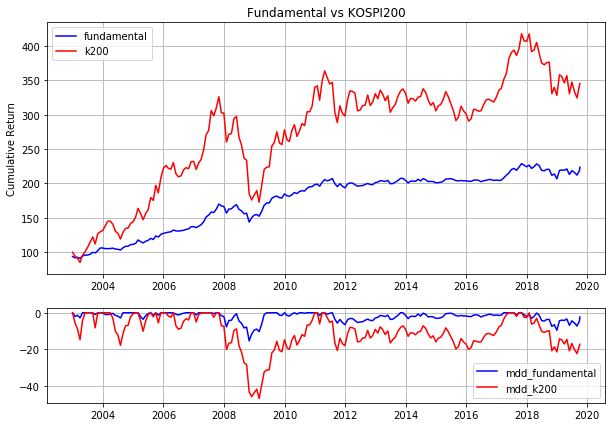

1

In [18]:
fundamental(tau=5, rank = 50)

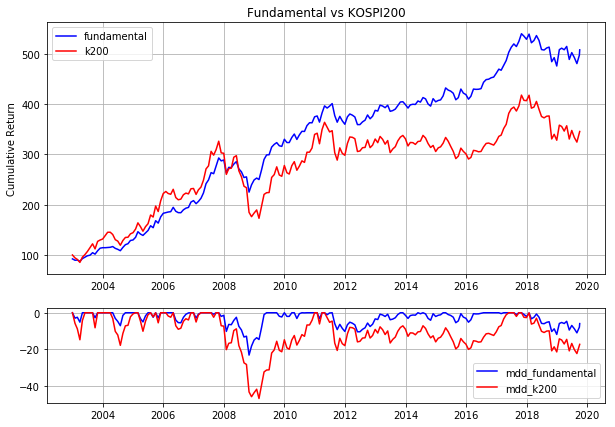

1

In [20]:
fundamental(tau=5, rank = 100)

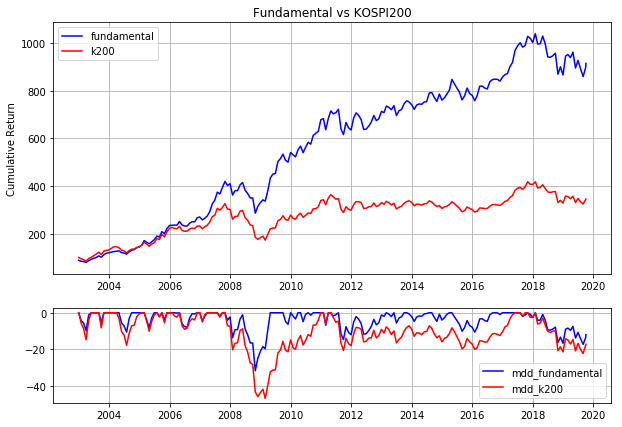

1

In [21]:
fundamental(tau=5, rank = 200)

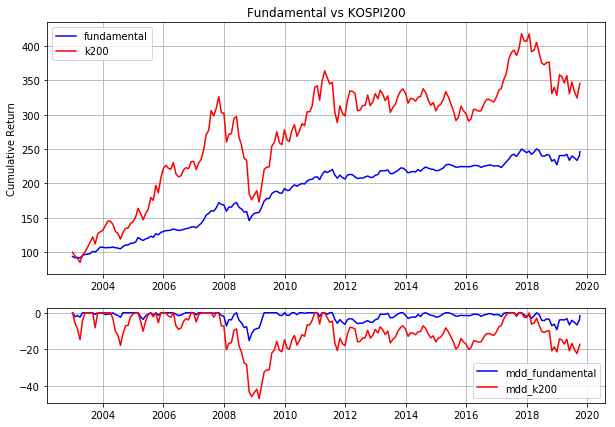

1

In [16]:
fundamental(tau=1,rank=50)

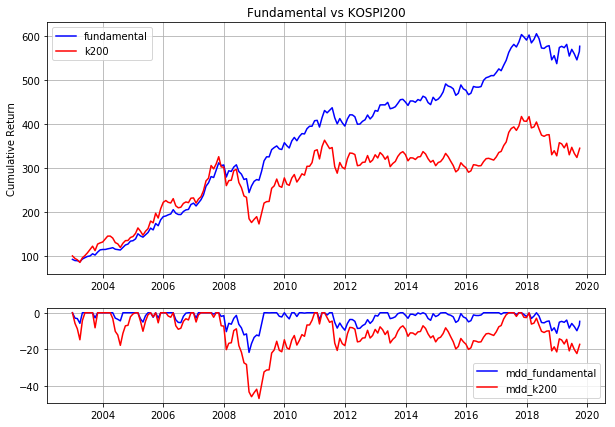

1

In [11]:
fundamental(tau=1, rank = 100)

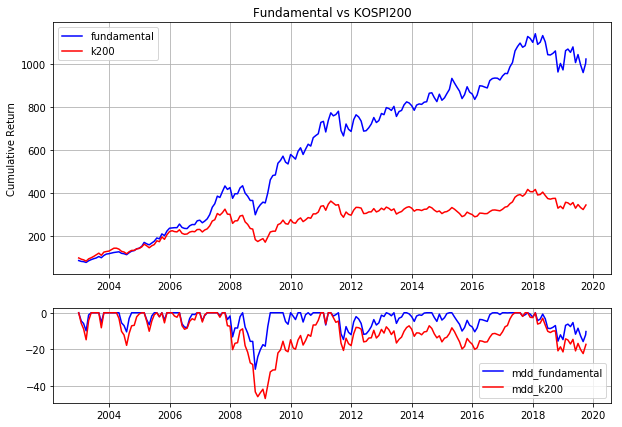

1

In [12]:
fundamental(tau=1, rank = 200)

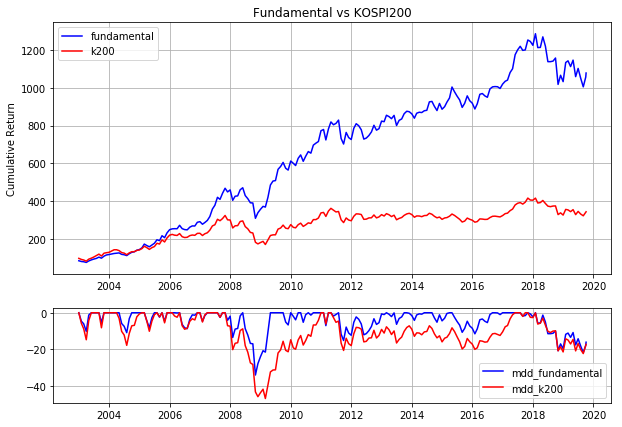

1

In [22]:
fundamental(tau=1 , rank=500)

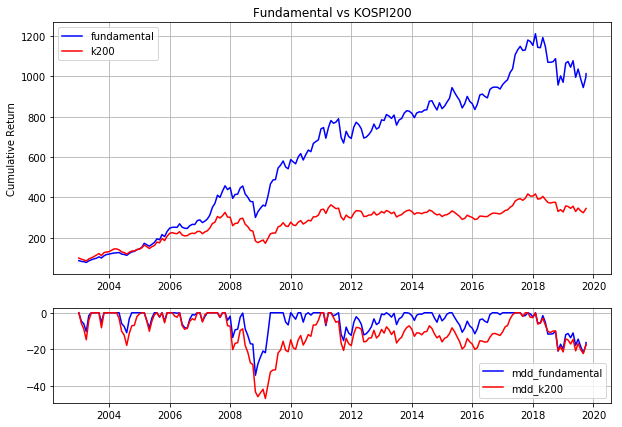

1

In [23]:
fundamental(tau = 5 , rank = 700)